# Site 734 correlations
This notebook plots the correlation of codon counts at site 734 between libraries

## Notebook setup
Imports

In [1]:
import itertools
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

%run functions/enrichment.py.ipynb import calculate_enrichment

pandas==0.25.3
plotnine==0.6.0


Input data

In [2]:
site_734_counts = 'results/site_734/site_734_counts.csv'
wt_codon = "GAT"

Output data

In [3]:
site_734_dir = 'results/site_734/'

Notebook aesthetics

In [4]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load site 734 frequencies

In [5]:
codon_counts = pd.read_csv(site_734_counts)
display(codon_counts)

,name,library,source,stage,sorted,site,wildtype,codon,count,letter
0,wt-plasmid-noStage-notSorted,wt,plasmid,noStage,notSorted,734,GAT,AAA,0,K
1,wt-gDNA-noStage-notSorted,wt,gDNA,noStage,notSorted,734,GAT,AAA,0,K
2,lib1-plasmid-noStage-notSorted,lib1,plasmid,noStage,notSorted,734,GAT,AAA,0,K
3,lib2-plasmid-noStage-notSorted,lib2,plasmid,noStage,notSorted,734,GAT,AAA,0,K
4,lib3-plasmid-noStage-notSorted,lib3,plasmid,noStage,notSorted,734,GAT,AAA,0,K
...,...,...,...,...,...,...,...,...,...,...
1083,lib2-gDNA-late-notSorted,lib2,gDNA,late,notSorted,734,GAT,TTT,0,F
1084,lib3-gDNA-late-notSorted,lib3,gDNA,late,notSorted,734,GAT,TTT,0,F
1085,lib1-gDNA-late-sorted,lib1,gDNA,late,sorted,734,GAT,TTT,0,F
1086,lib2-gDNA-late-sorted,lib2,gDNA,late,sorted,734,GAT,TTT,0,F


In [6]:
codon_counts['name'].unique()

array(['wt-plasmid-noStage-notSorted', 'wt-gDNA-noStage-notSorted',
       'lib1-plasmid-noStage-notSorted', 'lib2-plasmid-noStage-notSorted',
       'lib3-plasmid-noStage-notSorted', 'lib1-gDNA-early-notSorted',
       'lib2-gDNA-early-notSorted', 'lib3-gDNA-early-notSorted',
       'lib1-gDNA-mid-notSorted', 'lib2-gDNA-mid-notSorted',
       'lib3-gDNA-mid-notSorted', 'lib1-gDNA-late-notSorted',
       'lib2-gDNA-late-notSorted', 'lib3-gDNA-late-notSorted',
       'lib1-gDNA-late-sorted', 'lib2-gDNA-late-sorted',
       'lib3-gDNA-late-sorted'], dtype=object)

In [7]:
codon_counts_wide = (
    codon_counts
    .pivot(index='codon',
           columns='name',
           values='count'))
display(codon_counts_wide)

name,lib1-gDNA-early-notSorted,lib1-gDNA-late-notSorted,lib1-gDNA-late-sorted,lib1-gDNA-mid-notSorted,lib1-plasmid-noStage-notSorted,lib2-gDNA-early-notSorted,lib2-gDNA-late-notSorted,lib2-gDNA-late-sorted,lib2-gDNA-mid-notSorted,lib2-plasmid-noStage-notSorted,lib3-gDNA-early-notSorted,lib3-gDNA-late-notSorted,lib3-gDNA-late-sorted,lib3-gDNA-mid-notSorted,lib3-plasmid-noStage-notSorted,wt-gDNA-noStage-notSorted,wt-plasmid-noStage-notSorted
codon,,,,,,,,,,,,,,,,,
AAA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAC,82,38,32,47,129,85,70,37,49,54,77,53,20,72,83,33,0
AAG,88,59,71,126,64,71,16,64,216,65,71,53,36,56,88,0,0
AAT,75,58,62,59,28,32,53,72,35,6,38,65,27,62,10,205,20
ACA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGT,0,0,0,0,0,5,0,0,0,0,1,1,0,0,0,0,0
TTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TTC,42,80,68,51,65,14,128,48,52,62,60,150,35,61,64,0,0


## Plot correlations
First, define function to plot correlations.

In [15]:
def plot_correlation(input_df, lib_a, lib_b, source, stage, sort_status):
    r_value = (
        input_df
        .query(f'codon != "{wt_codon}"')
        [[f"{lib_a}-{source}-{stage}-{sort_status}",
          f"{lib_b}-{source}-{stage}-{sort_status}"]]
        .corr()
        .iloc[0,-1])
    plot = (
        p9.ggplot((input_df
                  .query(f'codon != "{wt_codon}"')),
                  p9.aes(x=f"{lib_a}-{source}-{stage}-{sort_status}",
                         y=f"{lib_b}-{source}-{stage}-{sort_status}")) +
        p9.geom_point(alpha=0.5) +
        p9.stat_smooth(method="lm",
                       se=False,
                       linetype='dashed',
                       color='gray') +
        p9.labs(x=f'{lib_a}',
                y=f'{lib_b}') +
        p9.ggtitle(f"{source} {stage} {sort_status}\nMutant Library Correlation") +
        p9.annotate('text',
                    x=.2*(input_df
                          .query(f'codon != "{wt_codon}"')
                          [f"{lib_a}-{source}-{stage}-{sort_status}"]
                          .max()),
                    y=(input_df
                          .query(f'codon != "{wt_codon}"')
                          [f"{lib_b}-{source}-{stage}-{sort_status}"]
                          .max()),
                    label=f'r = {r_value:.2g}') +
        p9.theme(figure_size=(3, 3)))
    return plot

Make list of libs to iterate through:

In [9]:
libs = ['lib1', 'lib2', 'lib3']

## Plot plasmid correlations

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


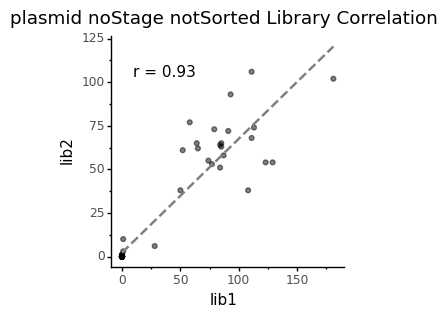

<ggplot: (8778269950869)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


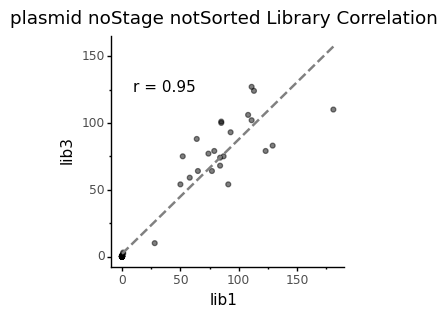

<ggplot: (8778086225833)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


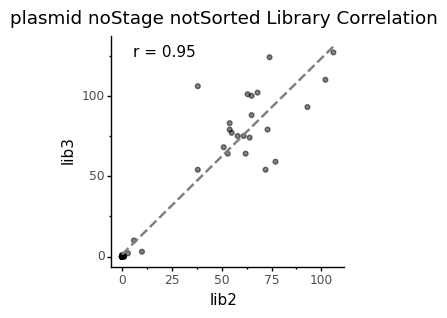

<ggplot: (8778077279977)>

In [10]:
source = "plasmid"
stage = "noStage"
sort_status = "notSorted"

for pair in list(itertools.combinations(libs, 2)):
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Early Correlations

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


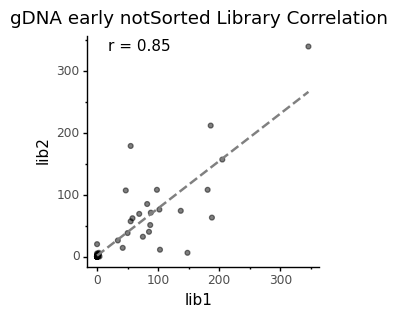

<ggplot: (8778077225297)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


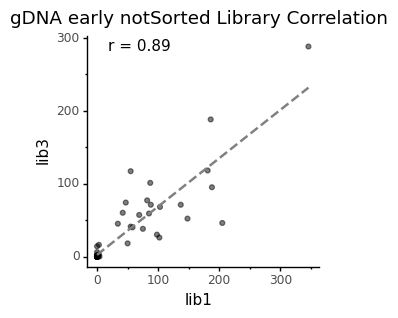

<ggplot: (8778077201805)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


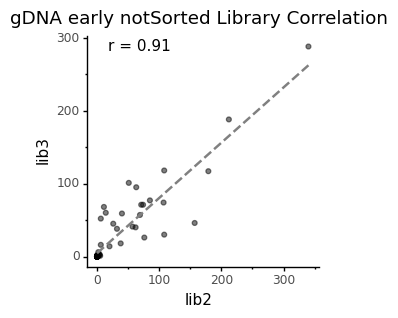

<ggplot: (8778077162549)>

In [11]:
source = "gDNA"
stage = "early"
sort_status = "notSorted"

for pair in list(itertools.combinations(libs, 2)):
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Mid Correlations

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


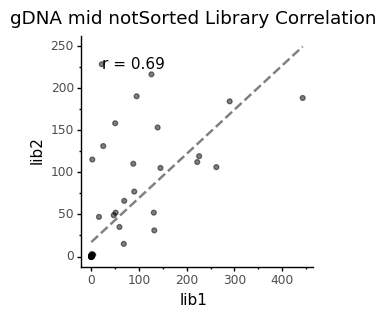

<ggplot: (8778077219417)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


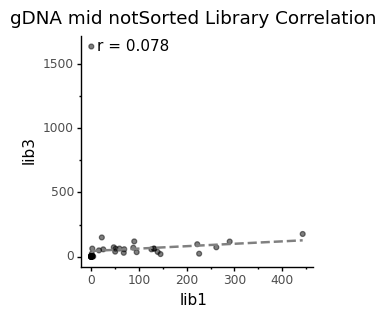

<ggplot: (8778077126089)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


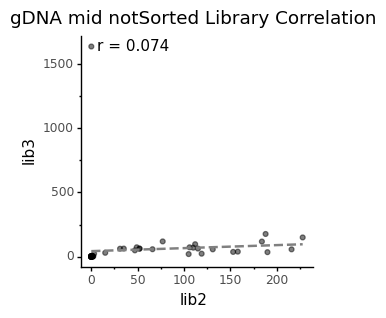

<ggplot: (8778077084989)>

In [12]:
source = "gDNA"
stage = "mid"
sort_status = "notSorted"

for pair in list(itertools.combinations(libs, 2)):
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

*Note:* There is a count in lib3 that is an outlier. At ~1600, it is much greater than all other counts observed in other libraries. I will plot the correlation between libraries if we remove this outlier:

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


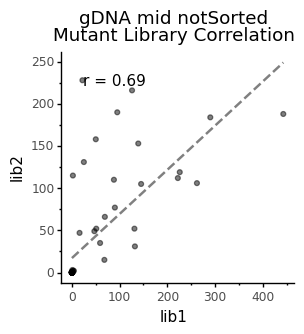

<ggplot: (8778076738465)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


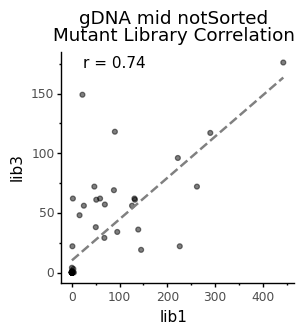

<ggplot: (8778076763317)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


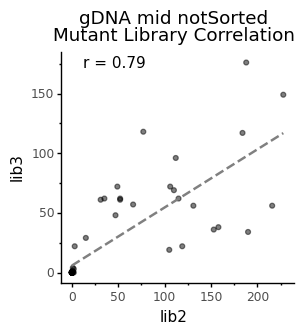

<ggplot: (8778076757149)>

In [22]:
source = "gDNA"
stage = "mid"
sort_status = "notSorted"

for pair in list(itertools.combinations(libs, 2)):
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide[(codon_counts_wide < 500)],
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Late Not-Sorted Correlations

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


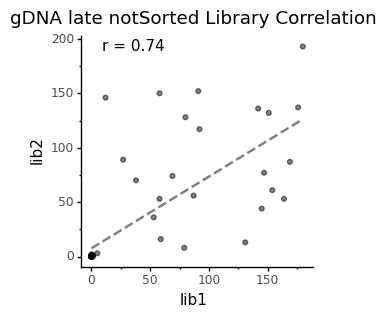

<ggplot: (8778077066637)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


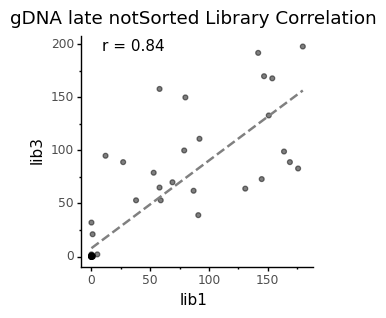

<ggplot: (8778269950869)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


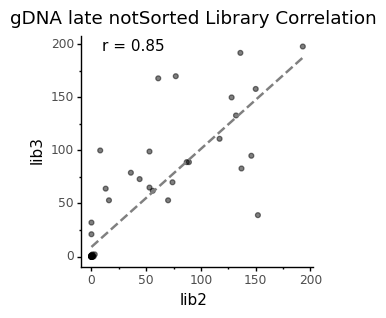

<ggplot: (8778077189765)>

In [13]:
source = "gDNA"
stage = "late"
sort_status = "notSorted"

for pair in list(itertools.combinations(libs, 2)):
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)

## Plot Late Sorted Correlations

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


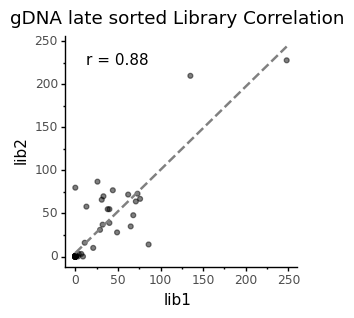

<ggplot: (8778086208173)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


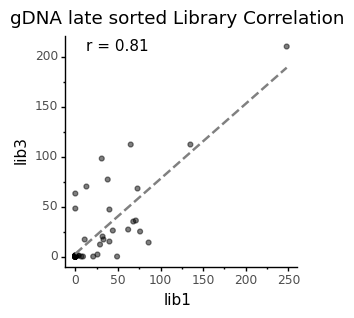

<ggplot: (8778086157713)>

/fh/fast/bloom_j/software/miniconda3/envs/dms_tools2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


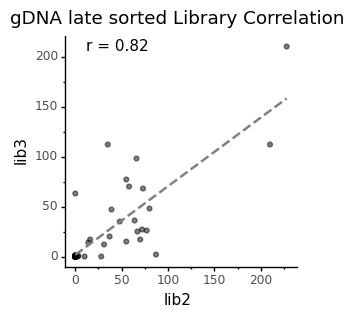

<ggplot: (8778077112521)>

In [14]:
source = "gDNA"
stage = "late"
sort_status = "sorted"

for pair in list(itertools.combinations(libs, 2)):
    lib_a=pair[0]
    lib_b=pair[1]
    plot = plot_correlation(codon_counts_wide,
                            lib_a,
                            lib_b,
                            source,
                            stage,
                            sort_status)
    display(plot)